In [1]:
import pandas as pd
import gzip

In [2]:
# loads in the gene expression data

In [3]:
gene_expression = pd.read_csv('GD462.GeneQuantRPKM.50FN.samplename.resk10.txt', sep="\t", header=None, low_memory = False)'

SyntaxError: EOL while scanning string literal (742715172.py, line 1)

In [4]:
gene_expression.columns = gene_expression.iloc[0]

In [5]:
gene_expression = gene_expression.drop(1)

In [6]:
gene_expression

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
0,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
2,ENSG00000183696.9,ENSG00000183696.9,7,48128225,8.1838049456063,5.68691050653862,2.43465332606958,3.83089421985197,6.61228835251498,4.70964559086586,...,13.4282045234374,6.09450021347043,12.5360002282421,2.21726194109841,3.5733936926424,7.58336362312906,4.05288249680221,1.57037789138744,4.90037157993696,6.73730772615299
3,ENSG00000139269.2,ENSG00000139269.2,12,57846106,1.19991028786682,1.57357169691446,0.521615781673147,1.44722544015787,3.56579072437701,1.98268073472144,...,3.2258799833111,1.99606676818196,2.85492257679522,2.2673431886837,1.33120130893328,2.18789497860221,1.00425018464045,3.00331644531769,1.98436164433707,1.68495376441438
4,ENSG00000169129.8,ENSG00000169129.8,10,116164515,0.831939826228749,0.0697777450667378,0.93108575037257,0.620940765480242,1.66066836204679,0.570481056180073,...,1.02338107083449,1.12785171976136,0.774409436730191,1.49585394690011,0.895341534092781,1.51352088239769,0.826377160076195,1.02120073024106,0.952502454332274,0.740564848897759
5,ENSG00000134602.11,ENSG00000134602.11,X,131157293,27.6464223725999,24.3955715036476,16.4453735152148,24.8066495438254,25.1133488775017,19.2339882617972,...,25.0794902396908,28.7255279873831,24.4505197886912,27.2640688548787,26.912814258775,29.5092096796423,26.4623310653975,25.6240094837144,25.7077412111,22.8249571422517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23718,ENSG00000235472.1,ENSG00000235472.1,13,29172970,31.5828320290074,34.0711227400805,19.3943649899489,37.5237211367612,33.4304729930734,37.8449661667153,...,47.9051816306095,33.2249771432944,39.8276750525068,27.0968114391705,34.6863419812271,37.3867664307838,30.5988397623729,33.5166736132845,32.0179400672363,38.3418877608794
23719,ENSG00000114423.14,ENSG00000114423.14,3,105588396,14.054748760431,14.4778986115636,11.5844248729361,12.6379555755068,12.0150889579783,13.7506548490315,...,11.7234616513629,9.90037179825582,10.4731148908897,13.4334130920033,15.8325942026318,19.2161764239324,10.2137390304876,14.5631918933105,15.6377318192498,8.35711666930873
23720,ENSG00000243312.2,ENSG00000243312.2,4,87791344,1.1121141608042,0.831796626301176,0.253228077394887,0.271567790368177,0.486085501799078,1.36263961084286,...,1.16899101084125,0.645388800074864,0.819469439178177,0.515448425254817,0.463053977778206,1.58065806736223,0.701395812098196,0.771233083401647,0.857329602627899,0.703369138046708
23721,ENSG00000257337.1,ENSG00000257337.1,12,53448222,3.82639552237179,6.04579844234177,2.59387189645369,4.4471690990816,5.29465685346747,4.10682285720431,...,6.52439848414536,6.01779513776767,3.46027288331991,3.90503183379483,5.02316095903094,5.33302741537529,5.69437040002951,8.14293940779238,5.62204306473048,6.02647646723125


In [7]:
gene_expression_new = gene_expression.iloc[1]
gene_expression_new = gene_expression_new.reset_index().drop([0,1,2,3])
gene_expression_new
gene_expression_new.to_csv('gene_expression_new_esha.csv')

In [8]:
# function to read in the vcf file.

In [51]:
def get_vcf_names(vcf_path):
    with gzip.open(vcf_path, "rt") as ifile:
          for line in ifile:
            if line.startswith("#CHROM"):
                  vcf_names = [x for x in line.split('\t')]
                  break
    ifile.close()
    return vcf_names

In [52]:
genotype = get_vcf_names('ALL.chr22.phase1_release_v3.20101123.snps_indels_svs.genotypes.vcf.gz')

In [53]:

vcf = pd.read_csv('ALL.chr22.phase1_release_v3.20101123.snps_indels_svs.genotypes.vcf.gz', compression='gzip', chunksize=50000, comment='#',low_memory=False, delim_whitespace=True, header=None, names=genotype)




In [54]:
vcf

In [81]:
# isolates gene expression data for chromosome 22

In [7]:
gene_expression_22 = gene_expression[gene_expression['Chr'] == '22'].sort_values(by='Coord')

In [8]:
gene_expression_22['Coord'] = gene_expression_22['Coord'].astype(int)

In [9]:
gene_expression_22

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
7536,ENSG00000215270.3,ENSG00000215270.3,22,16122720,8.81023082425509,6.9523322939112,3.93950080570592,8.18254639467261,8.96407316618287,7.39249567993223,...,8.95538138375798,8.45486552673574,12.0917288366866,6.52211538685662,8.57830920891826,7.62938006959661,7.72136715490613,7.42296962685983,8.33318968458795,9.1856126293503
5880,ENSG00000223875.1,ENSG00000223875.1,22,16124973,0.0274576678201534,0.0357798101203236,0.0327067621081011,0.0591218579669861,0.0595865081936115,0.0582796428972508,...,0.552614845305895,0.0465034273837762,0.227621040981251,0.0537067150368906,-0.00350587236301436,0.0592986446483225,0.0372268343082954,0.0564347577964089,0.0809935195496144,0.134969429118026
19640,ENSG00000206195.4,ENSG00000206195.4,22,16193004,0.586100681111418,0.570790764346552,-0.125131077117568,0.312199244518072,0.59097938011341,0.958898268366273,...,1.85628074401423,-0.0192807177503291,0.378078674502745,0.497466461057517,0.034675074323516,0.242558749583967,0.402835731928909,0.216573633764472,-0.19163258601204,0.299360055830498
10709,ENSG00000241838.2,ENSG00000241838.2,22,16256477,86.7503984402497,111.145890571251,67.7698213057566,96.4922661479254,92.2811088428489,91.5676993824486,...,101.350039146742,87.2562131637396,158.379330512047,117.061656867707,88.5760539813012,146.996900687904,133.341668250375,196.070454577479,93.0938484333894,107.468908162607
20355,ENSG00000224435.2,ENSG00000224435.2,22,16345912,0.0898641856968601,0.000589131422374642,0.0433569771064531,0.055510699075864,0.0874168818547129,0.0547429889924366,...,0.141187491529518,0.0869430448369674,0.0731875198638635,0.0737272906334986,0.0469639389312737,0.134968381518299,0.0115509301085212,0.0665579865082838,0.0696242723077062,0.141446350576335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,ENSG00000100299.12,ENSG00000100299.12,22,51066607,5.82975497446641,6.10690338742604,2.47608744714582,4.63095251537559,6.37575976533325,4.97231903071043,...,5.32547883984205,4.72312520813569,6.69877891701449,7.47796423218442,4.08944358253361,6.86111982481158,6.20225805617704,5.45222269837876,2.7809682849414,5.07411122816466
5369,ENSG00000251322.2,ENSG00000251322.2,22,51113070,0.0185477579582252,0.0271507611999721,0.00605236322537878,0.00527559455360759,0.0114458100619825,0.012147177406554,...,0.010811069702618,0.00217862241059471,0.006427666777282,0.00601537309697747,0.0161316033971104,0.0167162799609918,0.00782362820905432,0.00128505519397278,0.0113646413531584,-0.00218092357584857
12770,ENSG00000213683.3,ENSG00000213683.3,22,51193862,30.2671371001314,31.5721660673984,20.0724120763979,32.4938730987287,34.4778593805972,40.9034538756372,...,38.0523748856411,39.9897011194753,38.9171395700145,54.2228653432678,31.2502468678117,35.2240591952986,38.4591517007264,37.1686051773907,40.7694270735147,39.5312952528311
3327,ENSG00000184319.11,ENSG00000184319.11,22,51195376,14.9698058608828,17.7365281552184,7.70254742116851,16.213750062706,15.1208999250925,11.7080706487734,...,16.1788730464094,15.5070105854569,17.1576408930489,16.0939849428179,19.6410863561267,16.7999159666773,16.7525205170031,10.6978672676292,13.1438177909894,12.1869559822636


In [11]:
target = None
loc = None
for chunk_number, chunk in enumerate(vcf):
    print(chunk)
    for c in gene_expression_22['Coord'].values:
        if c in chunk['POS'].values:
            #print(chunk_number, c)
            loc = c
            target = chunk
            break

    else:
        continue
    break

NameError: name 'vcf' is not defined

In [61]:
target

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,HG00096,...,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20818,NA20819,NA20826,NA20828\n
0,22,16050408,rs149201999,T,C,100,PASS,LDAF=0.0649;RSQ=0.8652;AN=2184;ERATE=0.0046;VT...,GT:DS:GL,"0|0:0.050:-0.03,-1.17,-5.00",...,"0|0:0.000:-0.01,-1.70,-5.00","0|0:0.050:-0.20,-0.45,-1.99","0|0:0.000:-0.11,-0.64,-4.40","0|0:0.000:-0.19,-0.46,-1.95","0|0:0.000:-0.12,-0.63,-3.92","0|0:0.000:-0.0215912,-1.31426,-5","0|0:0.050:-0.10,-0.68,-3.85","0|0:0.000:-0.01,-1.68,-5.00","0|0:0.000:-0.00,-2.21,-5.00","0|0:0.000:-0.02,-1.38,-5.00"
1,22,16050612,rs146752890,C,G,100,PASS,AC=184;RSQ=0.8228;AVGPOST=0.9640;AN=2184;ERATE...,GT:DS:GL,"0|1:1.000:-2.05,-0.01,-1.71",...,"0|0:0.000:-0.01,-1.57,-5.00","0|0:0.000:-0.07,-0.82,-5.00","0|0:0.000:-0.04,-1.07,-5.00","0|0:0.000:-0.02,-1.36,-5.00","0|0:0.000:-0.20,-0.45,-2.04","0|0:0.050:-0.198322,-0.446433,-2.05257","0|0:0.050:-0.19,-0.47,-2.04","0|0:0.050:-0.12,-0.62,-3.52","0|0:0.000:-0.07,-0.83,-5.00","0|0:0.000:-0.00,-2.36,-5.00"
2,22,16050678,rs139377059,C,T,100,PASS,THETA=0.0050;AVGPOST=0.9904;RSQ=0.9240;AN=2184...,GT:DS:GL,"0|0:0.000:-0.02,-1.37,-5.00",...,"0|0:0.000:-0.04,-1.05,-5.00","0|0:0.000:-0.01,-1.72,-5.00","0|0:0.000:-0.01,-1.51,-5.00","0|0:0.000:-0.07,-0.82,-5.00","0|0:0.000:-0.11,-0.67,-4.22","0|0:0.000:-0.134233,-0.575903,-3.4437","0|0:0.000:-0.48,-0.48,-0.48","0|0:0.000:-0.00,-2.41,-5.00","0|0:0.000:-0.07,-0.84,-5.00","0|0:0.000:-0.18,-0.47,-2.27"
3,22,16050984,rs188945759,C,G,100,PASS,ERATE=0.0004;AN=2184;THETA=0.0266;VT=SNP;AA=.;...,GT:DS:GL,"0|0:0.000:-0.01,-1.84,-5.00",...,"0|0:0.000:-0.20,-0.44,-1.95","0|0:0.000:-0.08,-0.76,-4.70","0|0:0.000:-0.01,-1.53,-5.00","0|0:0.000:-0.48,-0.48,-0.48","0|0:0.000:-0.04,-1.08,-5.00","0|0:0.000:-0.19657,-0.448843,-2.08197","0|0:0.000:-0.48,-0.48,-0.48","0|0:0.000:-0.03,-1.15,-5.00","0|0:0.000:-0.19,-0.45,-2.28","0|0:0.000:-0.02,-1.38,-5.00"
4,22,16051107,rs6518357,C,A,100,PASS,ERATE=0.0004;THETA=0.0136;RSQ=0.9631;AN=2184;V...,GT:DS:GL,"0|0:0.000:-0.00,-3.13,-5.00",...,"0|0:0.000:-0.11,-0.65,-4.00","0|0:0.000:-0.04,-1.07,-5.00","0|0:0.000:-0.00,-2.39,-5.00","0|0:0.000:-0.11,-0.64,-3.59","0|0:0.000:-0.12,-0.60,-3.66","0|0:0.000:-0.19709,-0.448111,-2.07366","0|0:0.000:-0.12,-0.63,-3.44","0|0:0.000:-0.04,-1.04,-5.00","0|0:0.000:-0.07,-0.84,-5.00","0|0:0.000:-0.07,-0.83,-5.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,22,20882153,rs145470703,A,G,100,PASS,ERATE=0.0005;THETA=0.0004;AN=2184;LDAF=0.0054;...,GT:DS:GL,"0|0:0.000:-0.00,-2.05,-5.00",...,"0|0:0.000:-0.02,-1.36,-5.00","0|0:0.000:-0.01,-1.87,-5.00","0|0:0.000:-0.00,-2.68,-5.00","0|0:0.000:-0.03,-1.13,-5.00","0|0:0.000:-0.00,-2.04,-5.00","0|0:0.000:-0.00023459,-3.26761,-5","0|0:0.000:-0.48,-0.48,-0.48","0|0:0.000:-0.01,-1.59,-5.00","0|0:0.000:-0.01,-1.92,-5.00","0|0:0.000:-0.01,-1.63,-5.00"
49996,22,20882292,rs181174892,C,T,100,PASS,AA=C;AN=2184;RSQ=0.7452;AVGPOST=0.9997;THETA=0...,GT:DS:GL,"0|0:0.000:-0.00,-2.01,-5.00",...,"0|0:0.000:-0.10,-0.67,-4.22","0|0:0.000:-0.02,-1.32,-5.00","0|0:0.000:-0.10,-0.67,-4.70","0|0:0.000:-0.00,-2.23,-5.00","0|0:0.000:-0.00,-2.22,-5.00","0|0:0.000:-8.69777e-06,-4.69897,-5","0|0:0.000:-0.01,-1.94,-5.00","0|0:0.000:-0.01,-1.77,-5.00","0|0:0.000:-0.00,-2.22,-5.00","0|0:0.000:-0.01,-1.93,-5.00"
49997,22,20882327,rs12165407,C,T,100,PASS,AVGPOST=0.9986;AA=C;AN=2184;AC=26;LDAF=0.0124;...,GT:DS:GL,"0|0:0.000:-0.02,-1.44,-5.00",...,"0|0:0.000:-0.03,-1.13,-5.00","0|0:0.000:-0.01,-1.62,-5.00","0|0:0.000:-0.01,-1.66,-5.00","0|0:0.000:-0.06,-0.87,-5.00","0|0:0.000:-0.02,-1.38,-5.00","0|0:0.000:-9.55556e-05,-3.65758,-5","0|0:0.000:-0.02,-1.36,-5.00","0|0:0.000:-0.19,-0.46,-2.05","0|0:0.000:-0.01,-1.68,-5.00","0|0:0.000:-0.06,-0.86,-5.00"
49998,22,20882389,rs6001257,C,T,100,PASS,AA=C;RSQ=0.9889;AN=2184;THETA=0.0005;VT=SNP;AV...,GT:DS:GL,"0|0:0.000:-0.01,-1.74,-5.00",...,"0|0:0.000:-0.11,-0.65,-3.92","0|0:0.000:-0.01,-1.79,-5.00","0|0:0.000:-0.02,-1.33,-5.00","0|0:0.000:-0.07

In [9]:
# selecting random gene and variant
exp = gene_expression_22[gene_expression_22['Coord'] == loc]
allele = chunk[chunk['POS'] == loc]

NameError: name 'loc' is not defined

In [10]:
exp = exp.iloc[:,4:].T.drop_duplicates()

NameError: name 'exp' is not defined

In [65]:
exp = exp.reset_index()

In [66]:
exp

,0,505
0,HG00096,0.00789943397544489
1,HG00097,-0.00976926437104998
2,HG00099,-0.00660440801379395
3,HG00100,0.0590806569846561
4,HG00101,4.2685960412514e-05
...,...,...
457,NA20815,0.145888732684981
458,NA20816,0.0243152331597932
459,NA20819,-0.0155621197027528
460,NA20826,0.179786937963598


In [67]:
allele = allele.iloc[:,9:].T

In [68]:
allele

,47122
HG00096,"0|0:0.000:-0.20,-0.44,-2.10"
HG00097,"0|0:0.150:-0.48,-0.48,-0.48"
HG00099,"0|0:0.000:-0.48,-0.48,-0.48"
HG00100,"0|0:0.000:-0.19,-0.46,-1.99"
HG00101,"0|0:0.050:-0.48,-0.48,-0.48"
...,...
NA20816,"0|0:0.000:-0.0374886,-1.08249,-5"
NA20818,"0|0:0.000:-0.48,-0.48,-0.48"
NA20819,"0|0:0.050:-0.19,-0.47,-2.06"
NA20826,"0|0:0.000:-0.10,-0.67,-4.70"


In [84]:
# extracting binary values

In [69]:
allele[['allele','other']] = allele[47122].str.split('|', expand=True)

In [70]:
allele = allele['allele']

In [71]:
allele = pd.DataFrame(allele).reset_index().drop_duplicates()

In [72]:
allele

,index,allele
0,HG00096,0
1,HG00097,0
2,HG00099,0
3,HG00100,0
4,HG00101,0
...,...,...
1087,NA20816,0
1088,NA20818,0
1089,NA20819,0
1090,NA20826,0


In [73]:
# merging the dfs
merged_df = pd.merge(exp, allele, left_on= 0, right_on= 'index')
merged_df[505] = merged_df[505].astype(float)
merged_df['allele'] = merged_df['allele'].astype(int)
merged_df

,0,505,index,allele
0,HG00096,0.007899,HG00096,0
1,HG00097,-0.009769,HG00097,0
2,HG00099,-0.006604,HG00099,0
3,HG00100,0.059081,HG00100,0
4,HG00101,0.000043,HG00101,0
...,...,...,...,...
415,NA20814,0.106788,NA20814,0
416,NA20815,0.145889,NA20815,0
417,NA20816,0.024315,NA20816,0
418,NA20819,-0.015562,NA20819,0


/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [75]:
slope, intercept, r, p, se = stats.linregress((merged_df['allele'], merged_df[505]))

In [85]:
p

0.35110753317407006

In [76]:
r

0.04561081933376917

### ScaleUp 

In [2]:
from bed_reader import open_bed, sample_file

In [3]:
gene_expression = pd.read_csv('GD462.GeneQuantRPKM.50FN.samplename.resk10.txt', sep="\t", low_memory = False)

In [4]:
gene_expression 

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
0,ENSG00000152931.6,ENSG00000152931.6,5,59783540,0.101858,0.078110,0.048981,0.118597,0.004035,0.010925,...,0.088601,0.240010,0.137175,0.148494,0.038643,0.088509,0.029204,0.024423,0.044816,0.139186
1,ENSG00000183696.9,ENSG00000183696.9,7,48128225,8.183805,5.686911,2.434653,3.830894,6.612288,4.709646,...,13.428205,6.094500,12.536000,2.217262,3.573394,7.583364,4.052882,1.570378,4.900372,6.737308
2,ENSG00000139269.2,ENSG00000139269.2,12,57846106,1.199910,1.573572,0.521616,1.447225,3.565791,1.982681,...,3.225880,1.996067,2.854923,2.267343,1.331201,2.187895,1.004250,3.003316,1.984362,1.684954
3,ENSG00000169129.8,ENSG00000169129.8,10,116164515,0.831940,0.069778,0.931086,0.620941,1.660668,0.570481,...,1.023381,1.127852,0.774409,1.495854,0.895342,1.513521,0.826377,1.021201,0.952502,0.740565
4,ENSG00000134602.11,ENSG00000134602.11,X,131157293,27.646422,24.395572,16.445374,24.806650,25.113349,19.233988,...,25.079490,28.725528,24.450520,27.264069,26.912814,29.509210,26.462331,25.624009,25.707741,22.824957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23717,ENSG00000235472.1,ENSG00000235472.1,13,29172970,31.582832,34.071123,19.394365,37.523721,33.430473,37.844966,...,47.905182,33.224977,39.827675,27.096811,34.686342,37.386766,30.598840,33.516674,32.017940,38.341888
23718,ENSG00000114423.14,ENSG00000114423.14,3,105588396,14.054749,14.477899,11.584425,12.637956,12.015089,13.750655,...,11.723462,9.900372,10.473115,13.433413,15.832594,19.216176,10.213739,14.563192,15.637732,8.357117
23719,ENSG00000243312.2,ENSG00000243312.2,4,87791344,1.112114,0.831797,0.253228,0.271568,0.486086,1.362640,...,1.168991,0.645389,0.819469,0.515448,0.463054,1.580658,0.701396,0.771233,0.857330,0.703369
23720,ENSG00000257337.1,ENSG00000257337.1,12,53448222,3.826396,6.045798,2.593872,4.447169,5.294657,4.106823,...,6.524398,6.017795,3.460273,3.905032,5.023161,5.333027,5.694370,8.142939,5.622043,6.026476


In [5]:
gene_expression_22 = gene_expression[gene_expression['Chr'] == '22']

In [6]:
gene_t = gene_expression_22.melt(list(gene_expression_22.columns[:4]), var_name='sample_id', value_name='Value')

In [7]:
pop = pd.read_csv("ALL_1000G_phase1integrated_v3.sample", sep = ' ')

In [8]:
pop = pop.rename(columns ={'sample': 'sample_id'})

In [9]:
exp_pop = gene_t.merge(pop, on = "sample_id", how = "outer").dropna()

In [10]:
exp_pop  = exp_pop[['Gene_Symbol', 'Coord', 'sample_id', 'Value', 'group']]

In [11]:
bed = open_bed("output.bed")

In [12]:
val2 = bed.read()

In [14]:
bim_file = pd.read_csv("output.bim", sep='\t', header=None, 
            names=['CHR', 'SNP', 'GP', 'POS', 'A1', 'A2'])


In [15]:
gene_list = gene_expression_22['Gene_Symbol']

In [60]:
s = gene_list.reset_index()['Gene_Symbol']
s[s =='ENSG00000249590.3']

295    ENSG00000249590.3
Name: Gene_Symbol, dtype: object

In [16]:
gene_list[50:]

1900     ENSG00000128340.10
1910      ENSG00000254413.4
1972     ENSG00000100181.15
1973      ENSG00000227484.1
1989      ENSG00000183172.6
                ...        
23631     ENSG00000100121.8
23656    ENSG00000099958.10
23664     ENSG00000233360.2
23690     ENSG00000100335.8
23693    ENSG00000100325.10
Name: Gene_Symbol, Length: 583, dtype: object

In [17]:
gene_list

22        ENSG00000249263.2
29        ENSG00000224688.1
45       ENSG00000075240.12
81        ENSG00000099937.6
85       ENSG00000099998.12
                ...        
23631     ENSG00000100121.8
23656    ENSG00000099958.10
23664     ENSG00000233360.2
23690     ENSG00000100335.8
23693    ENSG00000100325.10
Name: Gene_Symbol, Length: 633, dtype: object

In [18]:
from scipy import stats
import numpy as np

In [19]:
sample_ids = bed.iid

In [20]:
bim_file

,CHR,SNP,GP,POS,A1,A2
0,22,rs149201999,0,16050408,C,T
1,22,rs146752890,0,16050612,G,C
2,22,rs139377059,0,16050678,T,C
3,22,rs6518357,0,16051107,A,C
4,22,rs62224609,0,16051249,C,T
...,...,...,...,...,...,...
101222,22,rs62240042,0,51233300,T,C
101223,22,rs200507571,0,51236013,AT,A
101224,22,rs3896457,0,51237063,C,T
101225,22,rs149733995,0,51238249,C,A


In [31]:
df_new = bim_file.reset_index().merge(df, left_on = 'index', right_on = 'snp_idx')
df_new

,index,CHR,SNP,GP,POS,A1,A2,snp_idx,p
0,8360,22,rs2073760,0,19506456,T,G,8360,1.000000
1,8361,22,rs13447289,0,19506476,T,C,8361,0.243367
2,8362,22,rs12167275,0,19506779,C,T,8362,0.957581
3,8363,22,rs9606046,0,19506981,C,G,8363,1.000000
4,8364,22,rs13447294,0,19507147,A,AT,8364,0.043317
...,...,...,...,...,...,...,...,...,...
2500,10860,22,rs16984693,0,20490447,G,T,10860,0.299153
2501,10861,22,rs73155195,0,20490507,A,T,10861,0.023758
2502,10862,22,rs188855964,0,20499048,G,T,10862,0.171319
2503,10863,22,rs141389634,0,20499061,A,T,10863,0.570301


In [35]:
df_new['MarkerName'] = df_new['CHR'].astype(str) + ":" + df_new['POS'].astype(str)

In [43]:
df_new.loc[2271]

index               10631
CHR                    22
SNP              rs701420
GP                      0
POS              20251086
A1                      T
A2                      C
snp_idx             10631
p                     0.0
MarkerName    22:20251086
Name: 2271, dtype: object

In [37]:
x = df_new[['MarkerName', 'p']]
x.columns = ['MarkerName', 'P-Value']

In [39]:
x.to_csv("my_locuszoom.csv")

In [41]:
df['p'].sort_values()

2271    1.475604e-09
630     1.428027e-07
50      7.275665e-07
2446    7.744221e-06
2449    1.911340e-05
            ...     
2120    1.000000e+00
1278    1.000000e+00
1283    1.000000e+00
1210    1.000000e+00
0       1.000000e+00
Name: p, Length: 2505, dtype: float64

In [ ]:
my_output = []
for i in gene_list[600:]:

    exp_pop.loc[exp_pop['Gene_Symbol'] == i][['sample_id', 'Value', 'group']]
    gene_coord = exp_pop.loc[exp_pop['Gene_Symbol'] == i]['Coord'].iloc[0]
    dists = abs(int(gene_coord) - bim_file['POS'])
    cis_dists_idx = dists[dists <= 500000].index
    for idx in cis_dists_idx:
        
        my_mini_output = []
        my_mini_output.append(i)
        my_mini_output.append(idx)
        my_val = val2[np.s_[::, idx]]
        snp_df = pd.DataFrame({'sample_id': sample_ids, 'snp': my_val})
        merged = exp_pop.merge(snp_df, on = 'sample_id')
        merged = merged.dropna()
        merged = merged[merged['group'] == 'EUR']
        slope, intercept, r, p, se = stats.linregress((merged['snp'].astype(np.float), merged['Value'].astype(np.float)))
        my_mini_output.append(p)
        print(p)
        my_mini_output.append(slope)
        my_output.append(my_mini_output)
    df = pd.DataFrame(my_output, columns = ['gene', 'snp_idx', 'p', 'slope'])
    df.to_csv('results_eur600.csv')

0.3096616342227892
0.30124649720252944
0.21337267514230088
0.8770367409177131
0.8770367409177131
0.8770367409177131
0.8770367409177131
0.2845631240676877
0.40954549121501627
0.3412280264113058
0.34838554692275026
0.20682518561466876
0.5117985029326244
0.31608397351353157
0.8520592635916686
0.31608397351353157
0.49691989059765085
0.8558806356242459
0.3429635688974221
0.3442823396156707
0.5117985029326244
0.887715729297899
0.49691989059765085
0.35097529992124876
0.8124958997204133
0.3429635688974221
0.6366856011175401
0.358036565117252
0.3429635688974221
0.651607626631101
0.3429635688974221
0.4249184404960802
0.9486853922082171
0.539190561137844
0.7785949497760933
0.3442823396156707
0.3429635688974221
0.33867728567012834
0.3429635688974221
0.3301069386631639
0.3442823396156707
0.8269701479761367
0.651607626631101
0.651607626631101
0.24955952054849795
0.5861634472150621
0.4761401176160892
0.296905326671068
0.762666056464018
0.7399282218776861
0.7712049520147584
0.7786061180978217
0.797051

/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:194: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)


1.0
1.0
1.0
0.9255750031384551
0.7972083107784714
0.8009800185253501
0.12718191007859694
0.4441261050151687
0.9996412471466672
0.9547979584170229
0.8471911279059374
0.8966327465421864
0.3767816387110817
0.8751944718720112
0.09758816735902116
0.24826341377863115
0.9160360578959907
0.15353526980780471
0.8596387457913488
0.7592693817166911
0.9411813551217154
0.6337720311345537
0.8733673164894633
0.6126968065087578
0.8058537450679419
0.8409988017030161
0.8417440641111072
0.8968171797790214
0.5720840381062418
0.9004510096127164
0.3803493096178271
0.930129715185591
0.6554998353166672
0.1699106034551713
0.011516429953344636
0.10675657343555954
0.9658928052044586
0.20577038591802613
0.01116368448485434
0.6493891374171387
0.600631709103252
0.6564551246621553
0.6564551246621553
0.6564551246621553
1.0
0.6564551246621553
0.7673961017500783
0.24008743352886422
0.3129622448202603
0.28945495352726713
1.0
0.8380228948744843
0.8195034994123206
0.4119716551032554
0.26528511140592703
0.9604316725813993
0

### End of ScaleUp

In [14]:
gene = gene_expression_22.loc[gene_expression_22['Gene_Symbol'] == 'ENSG00000215270.3'].iloc[0]

In [36]:
exp = pd.DataFrame(gene[4:]).reset_index()

In [37]:
exp.columns = ['sample_id', 'value']

In [40]:
exp

,sample_id,value
0,HG00096,8.81023082425509
1,HG00097,6.9523322939112
2,HG00099,3.93950080570592
3,HG00100,8.18254639467261
4,HG00101,8.96407316618287
...,...,...
457,NA20815,7.62938006959661
458,NA20816,7.72136715490613
459,NA20819,7.42296962685983
460,NA20826,8.33318968458795


In [17]:

dists = abs(int(gene['Coord']) - bim_file['POS'])
cis_dists_idx = dists[dists <= 1000000].index

In [26]:
import numpy as np

In [24]:
bed = open_bed("output.bed")

In [28]:
val2 = bed.read()

In [29]:
my_val = val2[np.s_[::,97789]]

In [41]:
bim_file

,CHR,SNP,GP,POS,A1,A2
0,22,rs149201999,0,16050408,C,T
1,22,rs146752890,0,16050612,G,C
2,22,rs139377059,0,16050678,T,C
3,22,rs6518357,0,16051107,A,C
4,22,rs62224609,0,16051249,C,T
...,...,...,...,...,...,...
101222,22,rs62240042,0,51233300,T,C
101223,22,rs200507571,0,51236013,AT,A
101224,22,rs3896457,0,51237063,C,T
101225,22,rs149733995,0,51238249,C,A


In [57]:
x = pd.DataFrame({'sample_id':bed.iid, 'snp':my_val})

In [60]:
exp_pop.loc[exp_pop['Gene_Symbol'] == 'ENSG00000215270.3'].merge(x, on = 'sample_id')

,TargetID,Gene_Symbol,Chr,Coord,sample_id,Value,population,group,sex,snp
0,ENSG00000215270.3,ENSG00000215270.3,22,16122720.0,HG00096,8.81023082425509,GBR,EUR,1.0,0.0
1,ENSG00000215270.3,ENSG00000215270.3,22,16122720.0,HG00097,6.9523322939112,GBR,EUR,2.0,0.0
2,ENSG00000215270.3,ENSG00000215270.3,22,16122720.0,HG00099,3.93950080570592,GBR,EUR,2.0,0.0
3,ENSG00000215270.3,ENSG00000215270.3,22,16122720.0,HG00100,8.18254639467261,GBR,EUR,2.0,0.0
4,ENSG00000215270.3,ENSG00000215270.3,22,16122720.0,HG00101,8.96407316618287,GBR,EUR,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
416,ENSG00000215270.3,ENSG00000215270.3,22,16122720.0,NA20815,7.62938006959661,TSI,EUR,1.0,0.0
417,ENSG00000215270.3,ENSG00000215270.3,22,16122720.0,NA20816,7.72136715490613,TSI,EUR,1.0,0.0
418,ENSG00000215270.3,ENSG00000215270.3,22,16122720.0,NA20819,7.42296962685983,TSI,EUR,2.0,1.0
419,ENSG00000215270.3,ENSG00000215270.3,22,16122720.0,NA20826,8.33318968458795,TSI,EUR,2.0,1.0


In [32]:
my_val

array([0., 0., 0., ..., 1., 1., 0.], dtype=float32)

In [21]:
cis_dists_idx

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050],
           dtype='int64', length=1051)

In [19]:
my_val = new_ind[np.s_[::,26]]
id_val = af_subset['sample_ids'] 
my_row = gene_exp_22.iloc[0]
df = pd.DataFrame(data = {'sample_id': id_val, 'snp': my_val.flatten()})
my_gene_exp = pd.DataFrame(my_row[4:]).reset_index()
my_gene_exp.columns = ['sample_id', 'value']
merged = pd.merge(df, my_gene_exp, on = 'sample_id')
merged = merged.dropna()
merged

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050],
           dtype='int64', length=1051)

In [13]:
gene_expression_22

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
7536,ENSG00000215270.3,ENSG00000215270.3,22,16122720,8.81023082425509,6.9523322939112,3.93950080570592,8.18254639467261,8.96407316618287,7.39249567993223,...,8.95538138375798,8.45486552673574,12.0917288366866,6.52211538685662,8.57830920891826,7.62938006959661,7.72136715490613,7.42296962685983,8.33318968458795,9.1856126293503
5880,ENSG00000223875.1,ENSG00000223875.1,22,16124973,0.0274576678201534,0.0357798101203236,0.0327067621081011,0.0591218579669861,0.0595865081936115,0.0582796428972508,...,0.552614845305895,0.0465034273837762,0.227621040981251,0.0537067150368906,-0.00350587236301436,0.0592986446483225,0.0372268343082954,0.0564347577964089,0.0809935195496144,0.134969429118026
19640,ENSG00000206195.4,ENSG00000206195.4,22,16193004,0.586100681111418,0.570790764346552,-0.125131077117568,0.312199244518072,0.59097938011341,0.958898268366273,...,1.85628074401423,-0.0192807177503291,0.378078674502745,0.497466461057517,0.034675074323516,0.242558749583967,0.402835731928909,0.216573633764472,-0.19163258601204,0.299360055830498
10709,ENSG00000241838.2,ENSG00000241838.2,22,16256477,86.7503984402497,111.145890571251,67.7698213057566,96.4922661479254,92.2811088428489,91.5676993824486,...,101.350039146742,87.2562131637396,158.379330512047,117.061656867707,88.5760539813012,146.996900687904,133.341668250375,196.070454577479,93.0938484333894,107.468908162607
20355,ENSG00000224435.2,ENSG00000224435.2,22,16345912,0.0898641856968601,0.000589131422374642,0.0433569771064531,0.055510699075864,0.0874168818547129,0.0547429889924366,...,0.141187491529518,0.0869430448369674,0.0731875198638635,0.0737272906334986,0.0469639389312737,0.134968381518299,0.0115509301085212,0.0665579865082838,0.0696242723077062,0.141446350576335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,ENSG00000100299.12,ENSG00000100299.12,22,51066607,5.82975497446641,6.10690338742604,2.47608744714582,4.63095251537559,6.37575976533325,4.97231903071043,...,5.32547883984205,4.72312520813569,6.69877891701449,7.47796423218442,4.08944358253361,6.86111982481158,6.20225805617704,5.45222269837876,2.7809682849414,5.07411122816466
5369,ENSG00000251322.2,ENSG00000251322.2,22,51113070,0.0185477579582252,0.0271507611999721,0.00605236322537878,0.00527559455360759,0.0114458100619825,0.012147177406554,...,0.010811069702618,0.00217862241059471,0.006427666777282,0.00601537309697747,0.0161316033971104,0.0167162799609918,0.00782362820905432,0.00128505519397278,0.0113646413531584,-0.00218092357584857
12770,ENSG00000213683.3,ENSG00000213683.3,22,51193862,30.2671371001314,31.5721660673984,20.0724120763979,32.4938730987287,34.4778593805972,40.9034538756372,...,38.0523748856411,39.9897011194753,38.9171395700145,54.2228653432678,31.2502468678117,35.2240591952986,38.4591517007264,37.1686051773907,40.7694270735147,39.5312952528311
3327,ENSG00000184319.11,ENSG00000184319.11,22,51195376,14.9698058608828,17.7365281552184,7.70254742116851,16.213750062706,15.1208999250925,11.7080706487734,...,16.1788730464094,15.5070105854569,17.1576408930489,16.0939849428179,19.6410863561267,16.7999159666773,16.7525205170031,10.6978672676292,13.1438177909894,12.1869559822636


In [11]:
# We created bed, bim and fam files using plink from the vcf data.
# We then read in the bed files and the bim files.
# However, we got a little confused on how to combine the information from these different files and scale up the analysis
# We understand that the bed files has infromation from multiple individuals and within each individual there is information
# for each snp. We just don't know how to combine all this info.

In [13]:
pip install bed_reader

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 4.0 MB 9.8 MB/s eta 0:00:01�██████████▌                | 1.9 MB 9.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
from bed_reader import open_bed, sample_file

In [21]:
bed = open_bed("output.bed")

In [22]:
samples = bed.iid

In [23]:
len(samples)

1092

In [24]:
val2 = bed.read()

In [30]:
len(val2[0])

101227

In [ ]:
# 101227 SNPs from 1092 individuals

In [35]:
pd.read_csv("output.fam", header = None, sep = ' ')

,0,1,2,3,4,5
0,HG00096,HG00096,0,0,0,-9
1,HG00097,HG00097,0,0,0,-9
2,HG00099,HG00099,0,0,0,-9
3,HG00100,HG00100,0,0,0,-9
4,HG00101,HG00101,0,0,0,-9
...,...,...,...,...,...,...
1087,NA20816,NA20816,0,0,0,-9
1088,NA20818,NA20818,0,0,0,-9
1089,NA20819,NA20819,0,0,0,-9
1090,NA20826,NA20826,0,0,0,-9


In [34]:
pd.read_csv("output.bim", header = None, sep = ' ')

,0
0,22\trs149201999\t0\t16050408\tC\tT
1,22\trs146752890\t0\t16050612\tG\tC
2,22\trs139377059\t0\t16050678\tT\tC
3,22\trs6518357\t0\t16051107\tA\tC
4,22\trs62224609\t0\t16051249\tC\tT
...,...
101222,22\trs62240042\t0\t51233300\tT\tC
101223,22\trs200507571\t0\t51236013\tAT\tA
101224,22\trs3896457\t0\t51237063\tC\tT
101225,22\trs149733995\t0\t51238249\tC\tA


In [2]:
import pandas as pd

In [5]:
pop = pd.read_csv("ALL_1000G_phase1integrated_v3.sample", sep = ' ')

In [18]:
pop

,sample,population,group,sex
0,HG00096,GBR,EUR,1
1,HG00097,GBR,EUR,2
2,HG00099,GBR,EUR,2
3,HG00100,GBR,EUR,2
4,HG00101,GBR,EUR,1
...,...,...,...,...
1087,NA20816,TSI,EUR,1
1088,NA20818,TSI,EUR,2
1089,NA20819,TSI,EUR,2
1090,NA20826,TSI,EUR,2


In [7]:
pop['group'].value_counts()

EUR    379
ASN    286
AFR    246
AMR    181
Name: group, dtype: int64

In [14]:
sample_ids = pop.iloc[:,0].str.split().str[0]

In [15]:
pop_groups = pop.iloc[:,0].str.split().str[2] #+ " "+pop.iloc[:,0].str.split().str[2]

In [16]:
pop_df = pd.DataFrame({'sample_ids':sample_ids,'pop_groups':pop_groups})

In [17]:
pop_df['pop_groups'].value_counts()

EUR    379
ASN    286
AFR    246
AMR    181
Name: pop_groups, dtype: int64

In [18]:
af_subset = pop_df[pop_df['pop_groups'] == 'EUR']

In [19]:
af_subset 

,sample_ids,pop_groups
0,HG00096,EUR
1,HG00097,EUR
2,HG00099,EUR
3,HG00100,EUR
4,HG00101,EUR
...,...,...
1087,NA20816,EUR
1088,NA20818,EUR
1089,NA20819,EUR
1090,NA20826,EUR


In [20]:
samples

array(['HG00096', 'HG00097', 'HG00099', ..., 'NA20819', 'NA20826',
       'NA20828'], dtype='<U7')

In [21]:
idxs = []
for i in af_subset['sample_ids']:
    idxs.append(list(samples).index(i))

In [22]:
new_ind = val2[idxs]

In [19]:
len(new_ind[0])

NameError: name 'new_ind' is not defined

In [24]:
import pandas as pd 
import numpy as np
import os, sys, logging

In [25]:
bim_file = pd.read_csv("output.bim", sep='\t', header=None, 
            names=['CHR', 'SNP', 'GP', 'POS', 'A1', 'A2'])

In [26]:
bim_file

,CHR,SNP,GP,POS,A1,A2
0,22,rs149201999,0,16050408,C,T
1,22,rs146752890,0,16050612,G,C
2,22,rs139377059,0,16050678,T,C
3,22,rs6518357,0,16051107,A,C
4,22,rs62224609,0,16051249,C,T
...,...,...,...,...,...,...
101222,22,rs62240042,0,51233300,T,C
101223,22,rs200507571,0,51236013,AT,A
101224,22,rs3896457,0,51237063,C,T
101225,22,rs149733995,0,51238249,C,A


In [27]:
x = 1 - bim_file['POS']

In [28]:
x[x ==  -16050407]

0   -16050407
Name: POS, dtype: int64

In [29]:
bim_file['POS'][bim_file['POS'] == 16050612].index[0]

1

In [30]:
gene_expression

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
0,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
2,ENSG00000183696.9,ENSG00000183696.9,7,48128225,8.1838049456063,5.68691050653862,2.43465332606958,3.83089421985197,6.61228835251498,4.70964559086586,...,13.4282045234374,6.09450021347043,12.5360002282421,2.21726194109841,3.5733936926424,7.58336362312906,4.05288249680221,1.57037789138744,4.90037157993696,6.73730772615299
3,ENSG00000139269.2,ENSG00000139269.2,12,57846106,1.19991028786682,1.57357169691446,0.521615781673147,1.44722544015787,3.56579072437701,1.98268073472144,...,3.2258799833111,1.99606676818196,2.85492257679522,2.2673431886837,1.33120130893328,2.18789497860221,1.00425018464045,3.00331644531769,1.98436164433707,1.68495376441438
4,ENSG00000169129.8,ENSG00000169129.8,10,116164515,0.831939826228749,0.0697777450667378,0.93108575037257,0.620940765480242,1.66066836204679,0.570481056180073,...,1.02338107083449,1.12785171976136,0.774409436730191,1.49585394690011,0.895341534092781,1.51352088239769,0.826377160076195,1.02120073024106,0.952502454332274,0.740564848897759
5,ENSG00000134602.11,ENSG00000134602.11,X,131157293,27.6464223725999,24.3955715036476,16.4453735152148,24.8066495438254,25.1133488775017,19.2339882617972,...,25.0794902396908,28.7255279873831,24.4505197886912,27.2640688548787,26.912814258775,29.5092096796423,26.4623310653975,25.6240094837144,25.7077412111,22.8249571422517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23718,ENSG00000235472.1,ENSG00000235472.1,13,29172970,31.5828320290074,34.0711227400805,19.3943649899489,37.5237211367612,33.4304729930734,37.8449661667153,...,47.9051816306095,33.2249771432944,39.8276750525068,27.0968114391705,34.6863419812271,37.3867664307838,30.5988397623729,33.5166736132845,32.0179400672363,38.3418877608794
23719,ENSG00000114423.14,ENSG00000114423.14,3,105588396,14.054748760431,14.4778986115636,11.5844248729361,12.6379555755068,12.0150889579783,13.7506548490315,...,11.7234616513629,9.90037179825582,10.4731148908897,13.4334130920033,15.8325942026318,19.2161764239324,10.2137390304876,14.5631918933105,15.6377318192498,8.35711666930873
23720,ENSG00000243312.2,ENSG00000243312.2,4,87791344,1.1121141608042,0.831796626301176,0.253228077394887,0.271567790368177,0.486085501799078,1.36263961084286,...,1.16899101084125,0.645388800074864,0.819469439178177,0.515448425254817,0.463053977778206,1.58065806736223,0.701395812098196,0.771233083401647,0.857329602627899,0.703369138046708
23721,ENSG00000257337.1,ENSG00000257337.1,12,53448222,3.82639552237179,6.04579844234177,2.59387189645369,4.4471690990816,5.29465685346747,4.10682285720431,...,6.52439848414536,6.01779513776767,3.46027288331991,3.90503183379483,5.02316095903094,5.33302741537529,5.69437040002951,8.14293940779238,5.62204306473048,6.02647646723125


In [31]:
gene_exp_22 = gene_expression[gene_expression['Chr']=='22']

In [32]:
gene_exp_22['index'] = gene_exp_22.index

/tmp/ipykernel_154/4241274941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_exp_22['index'] = gene_exp_22.index


In [33]:
gene_exp_22

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828,index
23,ENSG00000249263.2,ENSG00000249263.2,22,17140518,0.340655683045425,0.318941787643619,-0.00914537286087766,0.231502655607788,0.0897127042296577,0.482984037664288,...,0.213629140970946,0.225474192531497,0.134216366856992,0.128749160833455,0.0608408288972012,0.298061170447483,-0.0112916500477681,0.0582757048798643,-0.0133836248766768,23
30,ENSG00000224688.1,ENSG00000224688.1,22,21496660,4.19482678290498,3.36943991748552,2.33546963528404,4.47791017261007,3.64175770818101,3.29674119449301,...,3.9184398835497,4.97737208192597,3.25368280840799,3.32299700726828,6.61361686456084,3.43803902776806,3.76884036671076,3.24844665912306,4.30082466710705,30
46,ENSG00000075240.12,ENSG00000075240.12,22,46971909,3.53180307582482,3.6355413051615,1.25143401146451,3.00774510135253,3.57406998736535,4.5697576577356,...,3.73696870918923,3.15616808019079,6.78547012503557,5.64624277250789,2.41824265185768,4.67846560912319,4.62643514098986,5.10199382809584,4.10062232399654,46
82,ENSG00000099937.6,ENSG00000099937.6,22,21128167,0.519054383672934,0.399216259090027,0.0789651423919799,0.145627535129614,0.446992966850404,0.217271034588099,...,0.414906255217097,1.04761198101503,0.35379420536895,0.253339028382742,0.492649693373289,0.449070003795718,0.0811184125603329,0.164196970613907,0.287427995800525,82
86,ENSG00000099998.12,ENSG00000099998.12,22,24641110,0.0736303753259552,0.0411088117131338,0.0174933492344224,-0.0205524213077279,5.92476088528346e-05,-0.00778218209273858,...,0.00358406767953556,0.0270559567426443,0.00758256848864045,0.0638427904311466,0.0590517031066679,-0.00881982649855538,0.0174213319127853,0.0104711246597745,0.105646105233104,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23632,ENSG00000100121.8,ENSG00000100121.8,22,22988780,2.19885022451703,2.08306527499439,1.99658702809018,2.23911574233852,3.57045655395181,4.7313768364949,...,3.95998284710176,6.70621287184977,4.90528637681415,4.19023527031293,2.70722602187932,4.33731565903054,3.92287136118933,4.00608740540779,1.81417823106331,23632
23657,ENSG00000099958.10,ENSG00000099958.10,22,24181315,7.9774059040377,9.35829006242835,4.41608851142307,7.38803206360999,9.04065981814024,3.00618400108184,...,9.12537289439034,8.04082775408901,23.9252406919697,4.97808739433655,10.7657967389054,8.9423708355058,11.6374755198383,5.70906494384114,5.99173559273946,23657
23665,ENSG00000233360.2,ENSG00000233360.2,22,38054384,0.331823435147177,0.596443245213493,0.24930994463838,0.555525826223848,0.512439502047701,0.406920189115042,...,0.480949467686973,0.618141934218332,0.685900037278296,0.562675538968748,0.720029976567756,0.509327649484223,0.625646904061467,0.350220923992108,0.690760343422483,23665
23691,ENSG00000100335.8,ENSG00000100335.8,22,39895437,32.7801666160474,19.2579972443815,10.1344454828426,19.4921165750374,23.5149773885165,18.5739652222072,...,19.5758225628028,19.7628651224027,27.1837279367581,19.1153396053783,19.83955580199,17.4022288131931,15.7234915993084,18.447801206438,22.7209132938183,23691


In [34]:
new_ind

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 0., 2., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
my_val = new_ind[np.s_[::,26]]
id_val = af_subset['sample_ids'] 
my_row = gene_exp_22.iloc[0]
df = pd.DataFrame(data = {'sample_id': id_val, 'snp': my_val.flatten()})
my_gene_exp = pd.DataFrame(my_row[4:]).reset_index()
my_gene_exp.columns = ['sample_id', 'value']
merged = pd.merge(df, my_gene_exp, on = 'sample_id')
merged = merged.dropna()
merged

NameError: name 'np' is not defined

In [37]:
merged = merged.drop('sample_id', axis =1)


NameError: name 'merged' is not defined

In [36]:
merged['snp'].value_counts()

0.0    308
1.0     36
Name: snp, dtype: int64

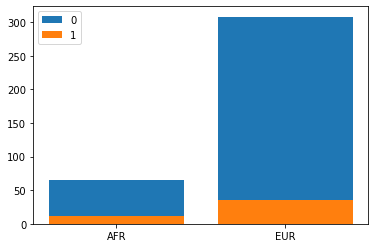

In [258]:
fig, ax = plt.subplots()
ax.bar(['AFR', 'EUR'], [65,308], label = 0)
ax.bar(['AFR', 'EUR'], [12,36], label = 1)
plt.legend()

In [186]:
merged_0 = merged.loc[merged['snp'] == 0.0]
merged_1 = merged.loc[merged['snp'] == 1.0]
merged_0['value'].astype(np.float)

0     0.121595
1     0.326894
2     0.264427
3     0.241830
4     0.099859
        ...   
71    0.338727
72    0.396751
73    0.083493
74   -0.013352
76    0.258020
Name: value, Length: 63, dtype: float64

([<matplotlib.axis.XTick at 0x7f34c4766730>,
 [Text(1, 0, '0'), Text(2, 0, '1')])

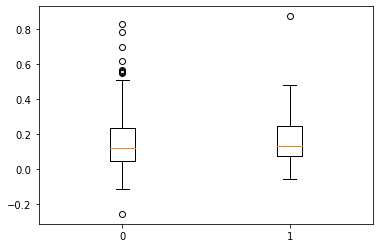

In [103]:
plt.boxplot((merged_0['value'].astype(np.float), merged_1['value'].astype(np.float)))
plt.xticks([1,2], [0,1])

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
from scipy import stats

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [41]:
len(gene_exp_22)

633

In [40]:
my_output_list = []
count_gene = 0
count_snp = 0
for i in range(619, len(gene_exp_22)):
#for i in range(1):
    
    my_row = gene_exp_22.iloc[i]
    dists = abs(int(my_row['Coord']) - bim_file['POS'])
    cis_dists_idx = dists[dists <= 500000].index
    #normalization = len(cis_dists_idx)
    for index in cis_dists_idx:
        mini_output = []
        mini_output.append(my_row['TargetID'])
        mini_output.append(index)
        my_val = new_ind[np.s_[::,index]]
        id_val = af_subset['sample_ids']       
        df = pd.DataFrame(data = {'sample_id': id_val, 'snp': my_val.flatten()})
        my_gene_exp = pd.DataFrame(my_row[4:]).reset_index()
        my_gene_exp.columns = ['sample_id', 'value']
        merged = pd.merge(df, my_gene_exp, on = 'sample_id')
        merged = merged.dropna()
        slope, intercept, r, p, se = stats.linregress((merged['snp'].astype(np.float), merged['value'].astype(np.float)))
        #my_output_list.append(se)
        mini_output.append(se)
        mini_output.append(p)
        my_output_list.append(mini_output)
        count_snp += 1
    count_gene += 1
    print(count_gene)
    my_final_df = pd.DataFrame(my_output_list, columns = ['gene', 'snp_index', 'standard_error', 'p_val'])
    my_final_df.to_csv("results_2.csv")
        #my_output_list.append(p)

/tmp/ipykernel_154/1155254538.py:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  slope, intercept, r, p, se = stats.linregress((merged['snp'].astype(np.float), merged['value'].astype(np.float)))
/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/opt/conda/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:194: RuntimeWarning: invalid value enc

1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [369]:
afr_slopes = my_output_list

In [370]:
afr_slopes[2]

0.061699633177434536

In [344]:
eur_slops = my_output_list

In [345]:
eur_slops[2]

0.01632475267348619

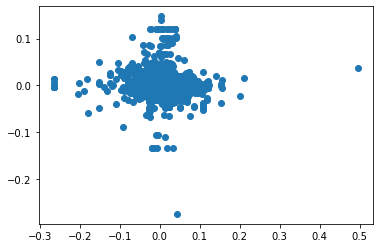

In [338]:
plt.scatter(afr_slopes, eur_slops)

<BarContainer object of 2 artists>

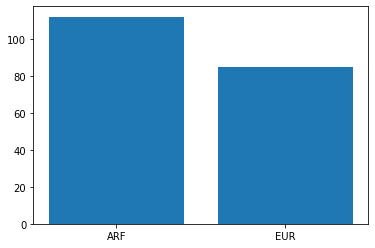

In [109]:
new_output_list = pd.Series(my_output_list)
afr_len = len(new_output_list[new_output_list < .05])
#afr_len was 112 for afr first and 85 for eur
plt.bar(np.array(['ARF', 'EUR']), np.array([112, 85]))

In [53]:
gene_expression_22[gene_expression_22['Gene_Symbol'] == 'ENSG00000099954.13']

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
8848,ENSG00000099954.13,ENSG00000099954.13,22,17840837,0.020627,0.042145,0.001036,-0.004844,0.056906,0.04132,...,0.112291,0.026808,0.031632,0.024535,0.054388,0.027608,-0.017117,0.139419,0.057295,0.096273


In [107]:
my_row = gene_exp_22.iloc[0]
dists = abs(int(my_row['Coord']) - bim_file['POS'])
cis_dists_idx = dists[dists <= 500000].index
cis_dists_idx

Int64Index([ 258,  259,  260,  261,  262,  263,  264,  265,  266,  267,
            ...
            2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512],
           dtype='int64', length=2255)

In [73]:
new_bim = bim_file.reset_index()

In [76]:
new_bim = new_bim.loc[new_bim['index'].isin(list(cis_dists_idx))].drop('index', axis=1)

In [79]:
my_df_2 = pd.DataFrame(new_bim['SNP'])

In [80]:
my_df_2.to_csv('snps.txt', header=None, index=None, sep=' ', mode='a')

In [55]:
len(my_output_list)

2255

In [59]:
my_df = pd.DataFrame(my_output_list)

In [61]:
my_df.to_csv('p_vals.txt', header=None, index=None, sep=' ', mode='a')

In [103]:
gene_exp_22.iloc[0]['TargetID']

'ENSG00000249263.2'

In [101]:
s

,1,2
0,HG00096,0.340655683045425
1,HG00097,0.318941787643619
2,HG00099,-0.00914537286087766
3,HG00100,0.231502655607788
4,HG00101,0.0897127042296577
...,...,...
458,NA20816,0.298061170447483
459,NA20819,-0.0112916500477681
460,NA20826,0.0582757048798643
461,NA20828,-0.0133836248766768


In [99]:
s = pd.DataFrame(gene_exp_22.iloc[0][4:]).reset_index()

In [64]:
gene_exp_22

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
23,ENSG00000249263.2,ENSG00000249263.2,22,17140518,0.340655683045425,0.318941787643619,-0.00914537286087766,0.231502655607788,0.0897127042296577,0.482984037664288,...,0.0321170610751359,0.213629140970946,0.225474192531497,0.134216366856992,0.128749160833455,0.0608408288972012,0.298061170447483,-0.0112916500477681,0.0582757048798643,-0.0133836248766768
30,ENSG00000224688.1,ENSG00000224688.1,22,21496660,4.19482678290498,3.36943991748552,2.33546963528404,4.47791017261007,3.64175770818101,3.29674119449301,...,4.66916414717888,3.9184398835497,4.97737208192597,3.25368280840799,3.32299700726828,6.61361686456084,3.43803902776806,3.76884036671076,3.24844665912306,4.30082466710705
46,ENSG00000075240.12,ENSG00000075240.12,22,46971909,3.53180307582482,3.6355413051615,1.25143401146451,3.00774510135253,3.57406998736535,4.5697576577356,...,4.05742558531185,3.73696870918923,3.15616808019079,6.78547012503557,5.64624277250789,2.41824265185768,4.67846560912319,4.62643514098986,5.10199382809584,4.10062232399654
82,ENSG00000099937.6,ENSG00000099937.6,22,21128167,0.519054383672934,0.399216259090027,0.0789651423919799,0.145627535129614,0.446992966850404,0.217271034588099,...,0.621081760500756,0.414906255217097,1.04761198101503,0.35379420536895,0.253339028382742,0.492649693373289,0.449070003795718,0.0811184125603329,0.164196970613907,0.287427995800525
86,ENSG00000099998.12,ENSG00000099998.12,22,24641110,0.0736303753259552,0.0411088117131338,0.0174933492344224,-0.0205524213077279,5.92476088528346e-05,-0.00778218209273858,...,0.0457301818918516,0.00358406767953556,0.0270559567426443,0.00758256848864045,0.0638427904311466,0.0590517031066679,-0.00881982649855538,0.0174213319127853,0.0104711246597745,0.105646105233104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23632,ENSG00000100121.8,ENSG00000100121.8,22,22988780,2.19885022451703,2.08306527499439,1.99658702809018,2.23911574233852,3.57045655395181,4.7313768364949,...,4.25417088799354,3.95998284710176,6.70621287184977,4.90528637681415,4.19023527031293,2.70722602187932,4.33731565903054,3.92287136118933,4.00608740540779,1.81417823106331
23657,ENSG00000099958.10,ENSG00000099958.10,22,24181315,7.9774059040377,9.35829006242835,4.41608851142307,7.38803206360999,9.04065981814024,3.00618400108184,...,5.59358743186246,9.12537289439034,8.04082775408901,23.9252406919697,4.97808739433655,10.7657967389054,8.9423708355058,11.6374755198383,5.70906494384114,5.99173559273946
23665,ENSG00000233360.2,ENSG00000233360.2,22,38054384,0.331823435147177,0.596443245213493,0.24930994463838,0.555525826223848,0.512439502047701,0.406920189115042,...,0.698185940229189,0.480949467686973,0.618141934218332,0.685900037278296,0.562675538968748,0.720029976567756,0.509327649484223,0.625646904061467,0.350220923992108,0.690760343422483
23691,ENSG00000100335.8,ENSG00000100335.8,22,39895437,32.7801666160474,19.2579972443815,10.1344454828426,19.4921165750374,23.5149773885165,18.5739652222072,...,15.526093784242,19.5758225628028,19.7628651224027,27.1837279367581,19.1153396053783,19.83955580199,17.4022288131931,15.7234915993084,18.447801206438,22.7209132938183


In [45]:
np.array([[1,2,3],[4,5,6],[7,8, 9]])[np.s_[::,2]]

array([3, 6, 9])

In [81]:
bim_file_3 = pd.read_csv("output3.bim", sep='\t', header=None, 
            names=['CHR', 'SNP', 'GP', 'POS', 'A1', 'A2'])

In [85]:
bim_file_3.iloc[:2255,:]

,CHR,SNP,GP,POS,A1,A2
0,22,rs183374454,0,16641018,T,C
1,22,rs192479180,0,16641660,A,C
2,22,rs80319087,0,16644857,G,C
3,22,rs138386113,0,16645749,T,C
4,22,rs137923339,0,16646087,A,G
...,...,...,...,...,...,...
2250,22,rs79822985,0,17639837,G,A
2251,22,rs71312076,0,17639918,G,T
2252,22,rs139723747,0,17640022,C,G
2253,22,rs7287672,0,17640045,A,G


In [19]:
d1 = pd.read_csv("results_from_400.csv")

In [20]:
d2 = pd.read_csv("results_from_466.csv")

In [21]:
d3 = pd.read_csv("results_from_501.csv")

In [22]:
d4 = pd.read_csv("results_from_512.csv")

In [23]:
d5 = pd.read_csv("results_from_552.csv")

In [24]:
d6 = pd.read_csv("results_from_620.csv")

In [66]:
d1[d1['p']< 2.9028536793380103e-08]

,Unnamed: 0,gene,snp_idx,p,slope
42472,42472,ENSG00000070010.12,8982,1.828827e-08,4.442377
87228,87228,ENSG00000182902.8,4978,8.791151e-10,11.603695
107965,107965,ENSG00000185837.3,1650,1.264893e-08,3.681607


In [65]:
d2[d2['p']< 2.9028536793380103e-08]

,Unnamed: 0,gene,snp_idx,p,slope
35899,35899,ENSG00000093009.5,8982,1.828827e-08,4.442377
94249,94249,ENSG00000220248.1,1650,1.264893e-08,3.681607


In [64]:
d3[d3['p']< 2.9028536793380103e-08]

,Unnamed: 0,gene,snp_idx,p,slope
10927,10927,ENSG00000185608.4,8982,1.828827e-08,4.442377


In [61]:
d4[d4['p']< 2.9028536793380103e-08]

,Unnamed: 0,gene,snp_idx,p,slope
6695,6695,ENSG00000100084.9,8982,1.828827e-08,4.442377
17794,17794,ENSG00000187979.3,4978,8.791151e-10,11.603695
54976,54976,ENSG00000099968.13,4978,8.791151e-10,11.603695
56452,56452,ENSG00000099899.9,8982,1.828827e-08,4.442377
64742,64742,ENSG00000183597.11,8982,1.828827e-08,4.442377


In [87]:
d5[d5['p']< 2.9028536793380103e-08]

,Unnamed: 0,gene,snp_idx,p,slope
10612,10612,ENSG00000239435.1,1650,1.264893e-08,3.681607
30555,30555,ENSG00000232926.1,8982,1.828827e-08,4.442377
44344,44344,ENSG00000235776.1,8982,1.828827e-08,4.442377


In [88]:
d6[d6['p']< 2.9028536793380103e-08]

,Unnamed: 0,gene,snp_idx,p,slope
5738,5738,ENSG00000236325.1,1650,1.264893e-08,3.681607


In [32]:
pop

,sample_id,population,group,sex
0,HG00096,GBR,EUR,1
1,HG00097,GBR,EUR,2
2,HG00099,GBR,EUR,2
3,HG00100,GBR,EUR,2
4,HG00101,GBR,EUR,1
...,...,...,...,...
1087,NA20816,TSI,EUR,1
1088,NA20818,TSI,EUR,2
1089,NA20819,TSI,EUR,2
1090,NA20826,TSI,EUR,2


In [46]:
pop

,sample_id,population,group,sex
0,HG00096,GBR,EUR,1
1,HG00097,GBR,EUR,2
2,HG00099,GBR,EUR,2
3,HG00100,GBR,EUR,2
4,HG00101,GBR,EUR,1
...,...,...,...,...
1087,NA20816,TSI,EUR,1
1088,NA20818,TSI,EUR,2
1089,NA20819,TSI,EUR,2
1090,NA20826,TSI,EUR,2


In [41]:
import matplotlib.pyplot as plt

In [60]:
gene_expression_22.loc[8240]

TargetID       ENSG00000183785.9
Gene_Symbol    ENSG00000183785.9
Chr                           22
Coord                   18593097
HG00096                 8.047307
                     ...        
NA20815                 4.460761
NA20816                 1.827397
NA20819                  4.26819
NA20826                 5.461839
NA20828                 5.347731
Name: 8240, Length: 466, dtype: object

In [85]:
gene_expression_22[gene_expression_22['Gene_Symbol'] == 'ENSG00000183597.11']

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
20265,ENSG00000183597.11,ENSG00000183597.11,22,20004537,7.081996,9.668741,7.500186,12.772385,9.895983,7.921243,...,16.191387,9.20561,13.287834,11.824842,11.91931,10.977794,9.477957,11.439882,10.146613,10.00085


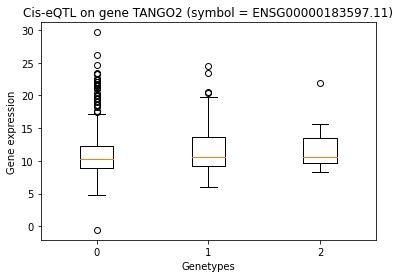

In [42]:
new_ind = val2
my_val = new_ind[np.s_[::,8982]]
id_val = pop['sample_id'] 
my_row = gene_expression_22.loc[20265]
df = pd.DataFrame(data = {'sample_id': id_val, 'snp': my_val.flatten()})
my_gene_exp = pd.DataFrame(my_row[4:]).reset_index()
my_gene_exp.columns = ['sample_id', 'value']
merged = pd.merge(df, my_gene_exp, on = 'sample_id')
merged = merged.dropna()
merged = merged.drop('sample_id', axis =1)
merged_0 = merged.loc[merged['snp'] == 0.0]
merged_1 = merged.loc[merged['snp'] == 1.0]
merged_2 = merged.loc[merged['snp'] == 2.0]
merged_0['value'].astype(np.float)
plt.boxplot((merged_0['value'].astype(np.float), merged_1['value'].astype(np.float), merged_2['value'].astype(np.float)))
plt.xticks([1,2,3], [0,1,2])
plt.title("Cis-eQTL on gene TANGO2 (symbol = ENSG00000183597.11)")
plt.xlabel("Genetypes")
plt.ylabel("Gene expression")
plt.savefig("boxplot.pdf")

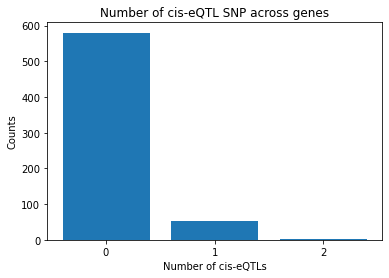

In [43]:
plt.bar(x = [0,1,2], height = [580,53,1])
plt.title("Number of cis-eQTL SNP across genes")
plt.xticks([0,1,2])
plt.xlabel("Number of cis-eQTLs")
plt.ylabel("Counts")
plt.savefig("barplot.pdf")

In [ ]:
#stacked and xy with european population

In [47]:
d1 = pd.read_csv("results_noneur109.csv")

In [46]:
d2 = pd.read_csv("results_noneur179.csv")

In [48]:
d3 = pd.read_csv("results_noneur187.csv")

In [49]:
d4 = pd.read_csv("results_noneur212.csv")

In [50]:
d5 = pd.read_csv("results_noneur238.csv")

In [51]:
d6 = pd.read_csv("results_noneur25.csv")

In [53]:
d7 = pd.read_csv("results_noneur283.csv")

In [54]:
d8 = pd.read_csv("results_noneur39.csv")

In [55]:
d9 = pd.read_csv("results_noneur61.csv")

In [56]:
d10 = pd.read_csv("results_noneur70.csv")

In [57]:
d11 = pd.read_csv('results_noneur81.csv')

In [58]:
d12 = pd.read_csv('results_noneur92.csv')

In [ ]:
d1[d1['p'] < 2.9028536793380103e-08].head(20)

In [ ]:
#581